# Neural signal processing
#### Daniela del Río


## Exercise 1, review of generative models (30 pts)
Write down simple pseudocode for the generation of simulated data for the following problems.

Example. Classification of data into K classes using labeled training data where the data are conditionally Gaussian.

 1. Generate a random number, k from 1, ..., K as the class identity. (Use the class prior probabilities to weight the choices.)

 2. Sample a random Gaussian from a Gaussian distribution with mean mu_k and covariance Sigma_k.

a. Clustering data into K clusters using a mixture of Gaussians model. (Hint: This might not be different from the example!)

As in the example, the pseudocode for this kind of clustering is the same:
 1. Generate a random number, k from 1, ..., K as the class identity. (Use the class prior probabilities to weight the choices.)

 2. Sample a random Gaussian from a Gaussian distribution with mean  mu_k and covariance Sigma_k.



b. Dimensionality reduction from D-dimensional data to M-dimensional data, using probabilistic PCA.

1. Do the E step which corresponds to the expected value by calculating the probabilities of $P(z_n|x_n)$.
2. Do the M step which corresponds to the maximization of the logarithm of the probability.

# FALTA No estoy segura de que asi obtengas datos simulados :/



c. A linear dynamical system with Gaussian initial state, innovations, and observation noise (i.e., the generative model for a Kalman filter).

1. Generate a function that simulates a dynamical system, that is, evolves in time.

# FALTA


## Exercise 2, convexity conditions for Poisson firing rate functions (30 pts)
Consider a set of k=1…N rat hippocampal neurons in which the number of spikes observed follows a Poisson distribution, nk∼Poisson(e−g(x)), where g(x) is some function of the rat’s position x.

(i.) Given an observation of spike counts, n=[n1,n2,…]T , what is the log likelihood function of the rats position x? What are the first and second derivatives of the log likelihood with respect to x?

# FALTA

(ii.) What conditions on $g(x)$ would ensure that $e^{−g(x)}$ is both convex and log-concave (i.e., $log(e^{−g(x))}$ is concave)? These constraints come from “Maximum likelihood estimation of cascade point-process neural encoding models”.

The following is based on the article, pg 5 of 21 (https://www.tandfonline.com/doi/abs/10.1088/0954-898X_15_4_002). 
( https://www.tandfonline.com/doi/pdf/10.1088/0954-898X_15_4_002?needAccess=true )

First, $g(x)$ must be a scalar function. 
be monotonic in u (we assume for simplicity that f (u) grows monotonically);
• grow at least linearly (and at most exponentially) as a function of u;
• decay at least exponentially as u → −∞ ;
• have a derivative, f ′(u), which must be not only monotonically increasing, but also
continuous everywhere except possibly at the point u0 = sup{u : f (u)  = 0}, and strictly
positive for all u > u 0;
• vanish either everywhere on the interval (−∞, u 0) or nowhere (u0 = −∞ )

# FALTA

In [19]:
import numpy as np

# import os.path
# import scipy.io
# import pandas as pd
# import re
# import glob
import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

## Exercise 3, single step of dynamical system estimation (30 pts)

a. Plot the log likelihood of the rat’s position, x, over the range [0,100] (ignore the term(s) in the likelihood function that is common to all positions). What is the maximum likelihood position of the rat?

In [4]:
MaxRates = np.load('hw6problem3/MaxRates.npy', allow_pickle=True) # spikes per second, r_max
FieldCenters = np.load('hw6problem3/FieldCenters.npy', allow_pickle=True) # mu
FieldWidths = np.load('hw6problem3/FieldWidths.npy', allow_pickle=True) # sigma
NeuralObservations = np.load('hw6problem3/NeuralObservations.npy', allow_pickle=True) #Spike counts for 250 ms of neural activity

In [10]:
len(NeuralObservations)

10

In [16]:
# Variable renaming
r_max = MaxRates
mu = FieldCenters
sigma = FieldWidths
n = NeuralObservations

In [13]:
def poisson(x, r_max, mu, sigma, dt=250): #dt is in ms
    return r_max*np.exp(-(x-mu**2)/(2*sigma**2))*dt

In [30]:
xs = [i for i in range(10000)]
ys = np.zeros(len(xs))

for j in range(len(xs)):
#     for i in range(10):
    i = 0
    ys[j] = poisson(xs[j], r_max[i], mu[i], sigma[i])
    

In [31]:
n[0]

2

In [37]:
for i in range(10000):
    if ys[i]>=n[0] and ys[i+1]<=n[0]:
        print("El valor que buscas es: ",i)

El valor que buscas es:  6470


In [39]:
ys[6470]
xs[6470]

6470

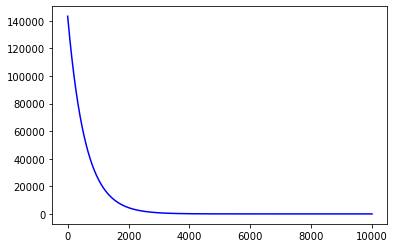

In [32]:
plt.plot(xs, ys, c="blue")
# plt.plot([xs[0], xs[99]], [n[i], n[i]], color="red")
plt.show()

b. Now assume that you have prior information about the rat’s position characterized by a normal distribution, with mean 30 and standard deviation 5. On the same graph as for (a), plot the log likelihood of the rat’s position using just your prior distribution and using both the prior distribution and the observations of neural activity. What is the maximum a posteriori position of the rat?
